In [1]:
pip install jsmetrics

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cmcrameri

Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter
from cmcrameri import cm
import FuncionesERA5 as fsE5
import jsmetrics

In [8]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel(xlab,fontsize=10)
    plt.ylabel(ylab,fontsize=10)
    plt.title(title,fontsize=11)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=8)

In [9]:
fileu_era5 = 'u_daily_500.nc'

In [10]:
filegph_era5 = 'gph_daily_500.nc'

In [11]:
u_ds = xr.open_dataset(fileu_era5)
u_era5 = u_ds['u']

In [12]:
lons = u_era5.longitude
lats = u_era5.latitude

### **<font color="Purple"> Datos de viento históricos (anual) </font>**

In [13]:
#Seleccionar solo 200 hPa 
ua200hPa = u_era5.sel(level=200)

In [14]:
ua_anual200hPa=ua200hPa.mean(dim='time') 

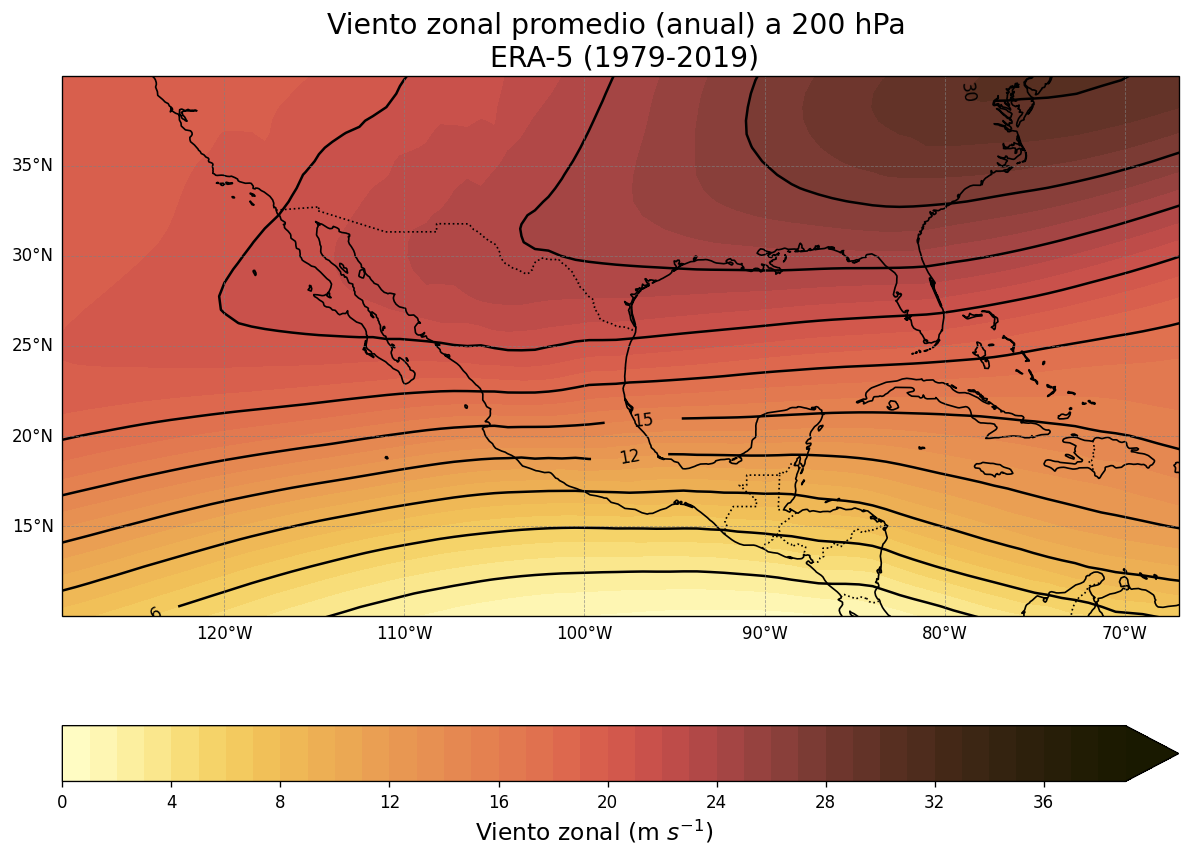

In [15]:
# fsE5.contour_f5(ua_anual200hPa,ua_anual200hPa,levels=np.arange(0,50,2),ccmap=cm.lajolla_r,extend='max',limite_NS=75,clevels=np.arange(5,50,15),
#           titulo='Simulación histórica del viento zonal a 200 hPa \nPromedio anual (1979-2019)',cbarlabel='Viento zonal [m $s^{-1}$]')

fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(lons,lats,ua_anual200hPa,levels=np.arange(0,40,1),cmap=cm.lajolla_r,extend='max',transform=ccrs.PlateCarree())
cc=ax.contour(lons,lats,ua_anual200hPa,levels=np.arange(0,40,3),colors='k',transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=14)
plt.title('Viento zonal promedio (anual) a 200 hPa \n ERA-5 (1979-2019)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

---
### **<font color="Purple"> Datos históricos de viento zonal en DJF</font>**
---

In [16]:
ua_estacion5=ua200hPa.groupby(ua200hPa.time.dt.season).mean(dim='time') 
E5_ua_DJF = ua_estacion5[0]

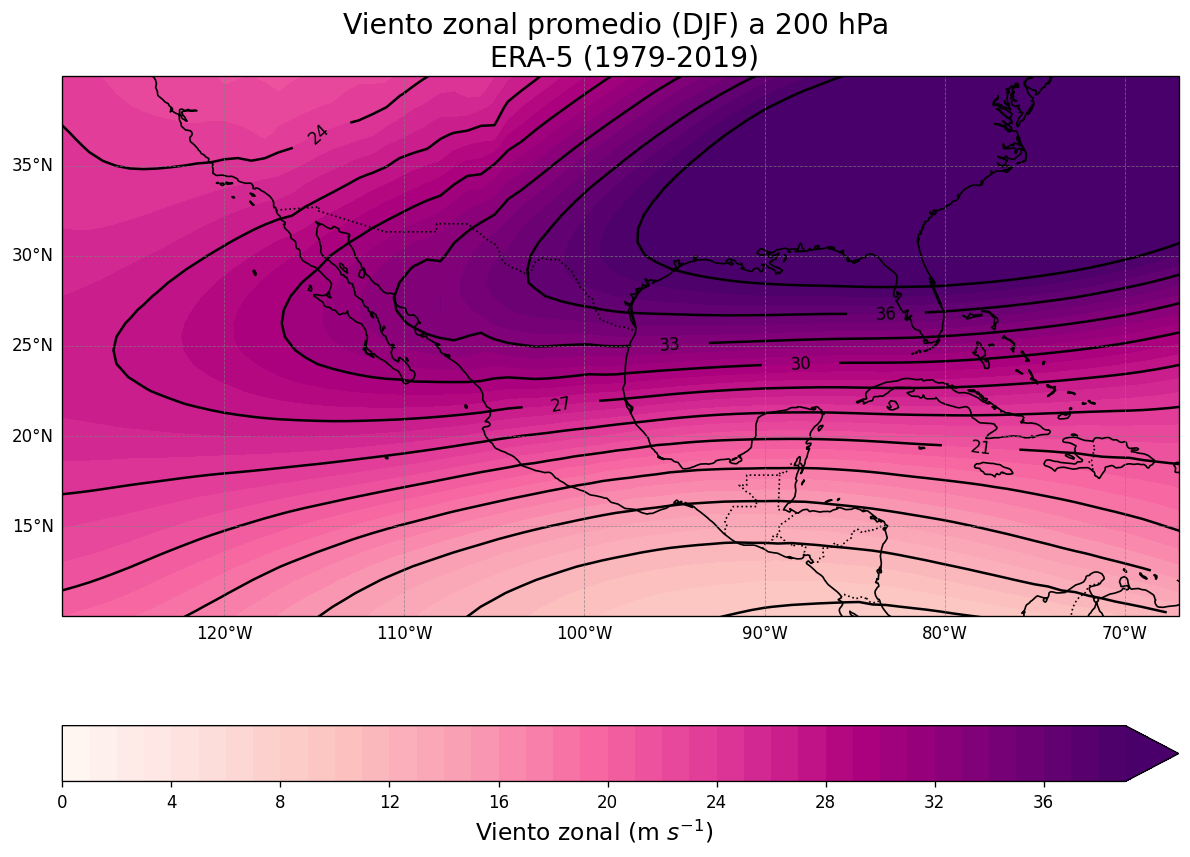

In [17]:
# fsE5.contour_f5(ua_DJF5,ua_DJF5,levels=np.arange(5,75),ccmap='RdPu',extend='max',limite_NS=75,clevels=np.arange(5,75,15),titulo=
#       'Simulación histórica del viento zonal a 200 hPa \nInvierno boreal (1979-2019)',cbarlabel='Viento zonal [m $s^{-1}$]')

fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(lons,lats,E5_ua_DJF,levels=np.arange(0,40,1),cmap='RdPu',extend='max',transform=ccrs.PlateCarree())
cc=ax.contour(lons,lats,E5_ua_DJF,levels=np.arange(0,40,3),colors='k',transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=14)
plt.title('Viento zonal promedio (DJF) a 200 hPa \n ERA-5 (1979-2019)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

---
###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Sección transversal del jet subtropical </i> </h1>
---

In [18]:
u_era5

<xarray.DataArray 'u' (time: 14761, level: 2, latitude: 59, longitude: 173)> Size: 2GB
[301331054 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 118kB 1979-01-01T11:30:00 ... 2019-05-31...
  * longitude  (longitude) float32 692B 195.8 196.5 197.2 ... 323.2 324.0 324.8
  * latitude   (latitude) float32 236B 44.25 43.5 42.75 42.0 ... 2.25 1.5 0.75
  * level      (level) float64 16B 200.0 500.0
Attributes:
    standard_name:  eastward_wind
    long_name:      U component of wind
    units:          m s**-1
    cell_methods:   day_of_year: mean

In [19]:
def E5transversal_anual (ua,nivel_A,nivel_B):
    """
    Esta función genera la sección transversal del jet entre dos niveles de presión elegidos
    ua: set de datos
    nivel_A: menor presión 
    nivel_B: mayor presión
    """
    # Convertir nivel_A y nivel_B a float
    nivel_A = float(nivel_A)
    nivel_B = float(nivel_B)

    # Seleccionar la sección de niveles
    seccion = ua.sel(level=slice(nivel_A, nivel_B))
    # if nivel_A > nivel_B:
    #     raise ValueError("nivel_A debe ser menor que nivel_B")


    ua_clima = seccion.groupby('time.year').mean(dim=['time','longitude']) 
    año = ua_clima.mean(dim='year')
    season = seccion.groupby('time.season').mean(dim=['time','longitude'])
    mensual = seccion.groupby('time.month').mean(dim=['time','longitude'])
    
    #estos o por estacion
    OND = mensual.sel(month=[10, 11, 12]).mean(dim='month')
    NDJ = mensual.sel(month=[11, 12, 1]).mean(dim='month')
    DJF = mensual.sel(month=[12, 1, 2]).mean(dim='month')
    JFM = mensual.sel(month=[1, 2, 3]).mean(dim='month')

    return {'anual':año,'estación':season,'OND': OND, 'NDJ': NDJ, 'DJF': DJF, 'JFM': JFM} 

In [20]:
Res_transversal = E5transversal_anual(u_era5,200,500)

In [21]:
Res_transversal

{'anual': <xarray.DataArray 'u' (level: 2, latitude: 59)> Size: 944B
 array([[24.76436132, 24.84745454, 24.85021464, 24.78519085, 24.6628953 ,
         24.49283911, 24.27915687, 24.02591504, 23.73727724, 23.4179123 ,
         23.07713493, 22.72509314, 22.37093397, 22.02189635, 21.68056372,
         21.35284247, 21.04038491, 20.74754455, 20.47712371, 20.22693558,
         19.99613188, 19.7869648 , 19.59805256, 19.42383408, 19.25717123,
         19.08705153, 18.90655529, 18.70716411, 18.48060251, 18.2154969 ,
         17.90439466, 17.53592277, 17.10405419, 16.59971341, 16.03040907,
         15.39889457, 14.70959784, 13.97133507, 13.18710839, 12.36319407,
         11.50527234, 10.62496481,  9.72775319,  8.82263962,  7.92006602,
          7.03427267,  6.18155489,  5.37384158,  4.64546601,  4.01563316,
          3.49424697,  3.10036932,  2.83831912,  2.70739102,  2.69622553,
          2.78902882,  2.9684516 ,  3.21227021,  3.49906082],
        [15.29791725, 15.31217723, 15.25232091, 15.1236

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Estadística </i> </h1>
#####   - `Anual` y `en una región`

In [22]:
mx_slicedE5 = u_era5.sel(latitude=slice(44,22)) 
mx_slicedE5 = mx_slicedE5.sel(longitude=slice(255,262)) 

In [29]:
mx_slicedE5 = mx_slicedE5.rename({'latitude': 'lat', 'longitude': 'lon','level':'plev'})

In [30]:
mx_slicedE5=mx_slicedE5.rename('ua') 

In [31]:
mx_slicedE5

<xarray.DataArray 'ua' (time: 14761, plev: 2, lat: 21, lon: 10)> Size: 50MB
[6199620 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 118kB 1979-01-01T11:30:00 ... 2019-05-31T1...
  * lon      (lon) float32 40B 255.0 255.8 256.5 257.2 ... 260.2 261.0 261.8
  * lat      (lat) float32 84B 37.5 36.75 36.0 35.25 ... 24.75 24.0 23.25 22.5
  * plev     (plev) float64 16B 200.0 500.0
Attributes:
    standard_name:  eastward_wind
    long_name:      U component of wind
    units:          m s**-1
    cell_methods:   day_of_year: mean

In [32]:
def E5js_pos_intens(ua1, nivel): 
    """
    Esta función encuentra la posición promedio y la intensidad, usando el método de Woollings et al. 2010.
    
    Parameters:
    ua1: Viento zonal de la simulación 1 (DataArray o Dataset).
    nivel: a qué nivel de presión se hará el cálculo, en Pa.
    
    Returns:
    dict: Un diccionario con la posición y velocidad del jet en la simulación.
    """
    nivel = float(nivel)
    
    # Convertir el tiempo a gregoriano
    ua1 = ua1.convert_calendar(calendar='gregorian', align_on='year')
    
    # Usar jsmetrics para obtener estadísticas del jet
    sim1 = jsmetrics.jet_statistics.woollings_et_al_2010(ua1.sel(plev=nivel), filter_freq=4, window_size=20)
    
    # Calcular la posición promedio del jet
    sim1_p = sim1["jet_lat"].groupby(sim1["jet_lat"].time.dt.year).mean()
    
    # Calcular la velocidad promedio del jet
    sim1_v = sim1["jet_speed"].groupby(sim1["jet_speed"].time.dt.year).mean()
    
    # Retornar resultados en un diccionario
    return {
        'Posición del jet en simulación 1': sim1_p,
         'Velocidad del jet en simulación 1': sim1_v
            }


In [33]:
res_pos_intensidad = E5js_pos_intens(mx_slicedE5,200)

In [34]:
res_pos_intensidad

{'Posición del jet en simulación 1': <xarray.DataArray 'jet_lat' (year: 41)> Size: 328B
 array([31.02676056, 31.75614754, 31.70136986, 32.23356164, 29.75342466,
        31.06967213, 31.93356164, 31.73835616, 29.74726027, 30.45286885,
        32.56849315, 31.40136986, 30.58150685, 30.68647541, 31.31917808,
        31.98082192, 31.34794521, 31.60040984, 30.6       , 31.35410959,
        30.9369863 , 31.76844262, 30.55890411, 31.77534247, 30.69246575,
        30.68647541, 31.03972603, 31.45479452, 30.98630137, 31.4795082 ,
        31.26986301, 30.61027397, 31.56369863, 29.96721311, 30.98424658,
        31.85136986, 31.41369863, 31.28688525, 31.81027397, 32.52534247,
        30.27659574])
 Coordinates:
     plev     float64 8B 200.0
   * year     (year) int64 328B 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019,
 'Velocidad del jet en simulación 1': <xarray.DataArray 'jet_speed' (year: 41)> Size: 328B
 array([32.90910693, 33.77118729, 32.20134834, 32.46786083, 35.67762506,
        32.4935

In [35]:
#help(jsmetrics.jet_statistics)

In [36]:
def E5varianza (sim1_p,sim1_v): #sim2_p, sim2_v
            #Varianza de posición
    #simulación 1
    var_1p=sim1_p.var().round(2)
    mean_1p=sim1_p.round(2)

            #Varianza de velocidad
    #simulación 1
    var_1v=sim1_v.var().round(2)
    mean_1v=sim1_v.round(2)
   
    #GRAFICAR
    graf_mean=[mean_1p,mean_1v]
    graf_var=[var_1p,var_1v]
    colors=["#FF8F00","#FFC100"]
    colorf=["#AF47D2","#A87676"]
    eje=["Latitud promedio [°N]","Velocidad promedio [m/s]"]
    titulo = [
        [input("Nombre de la simulación 1: "), "Posición"],
        [input("Nombre de la simulación 1: "), "Velocidad"],
        ]
    fig = plt.figure(figsize=(12, 5),dpi=120)
    for i,value in enumerate(graf_mean):
        
        # hacer el objeto multi-panel y seleccionar el panel correcto con el indice que varia en el ciclo iseason
        ax = fig.add_subplot(1, 2, 1+i)
        ax.plot(value.year,value,color=colors[i])
        ax.fill_between(value.year,value+graf_var[i], value-graf_var[i], alpha=0.2,color=colorf[i],label="Varianza")
        lineplot_setup(value.year.min()-1,value.year.max()+1,"Años",eje[i],ymin=None,ymax=None,title=(f"{titulo[i][1]} del Jet Subtropical durante \nel invierno boreal sobre el norte de México \n{titulo[i][0]}"),legend=True)
        plt.tight_layout()
            
        
    # ultimo arreglo, apretar el mapa
    plt.tight_layout(h_pad=3)
    plt.subplots_adjust(top=0.8)
    fig.suptitle("Análisis estadístico del Jet Subtropical\n",fontsize=14,color="red");
    plt.show()
    return fig


Nombre de la simulación 1:  1
Nombre de la simulación 1:  1


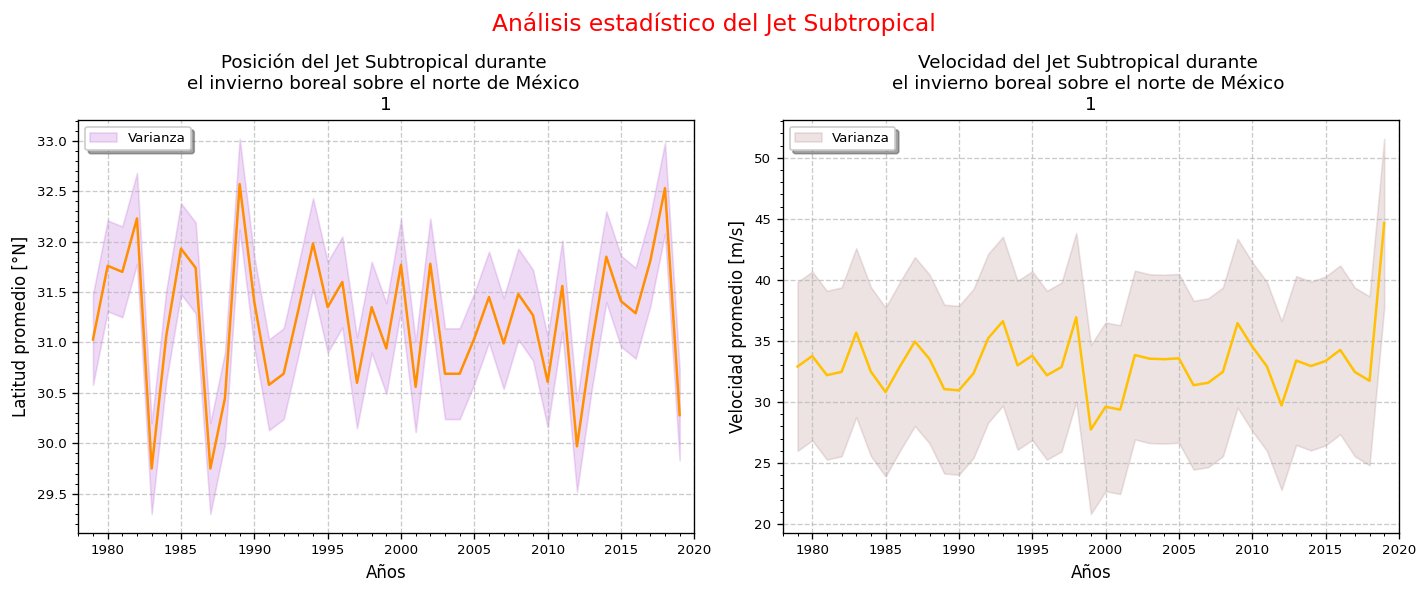

In [37]:
VAR = E5varianza(res_pos_intensidad['Posición del jet en simulación 1'],
               res_pos_intensidad['Velocidad del jet en simulación 1'])

In [38]:
def E5prob_posicion(ua1,nivel): #ua2
    # Solicitar títulos para las simulaciones
    titulo_sim1 = input("Título simulación 1: ")
    
    nivel = float(nivel)
    sim1 = jsmetrics.jet_statistics.woollings_et_al_2010(ua1.sel(plev=nivel), filter_freq=4, window_size=20)
    
    # Crear diccionario con resultados de las posiciones del Jet
    d_lat = {
        f'Posición del Jet Subtropical sobre el Norte de México durante el invierno boreal\n{titulo_sim1}': sim1['jet_lat']
    }
    
    # Convertir calendario a gregoriano
    ua1 = ua1.convert_calendar(calendar='gregorian', align_on='year')
   
    # Configuración de la gráfica
    plt.figure(figsize=(10, 5), dpi=130)
    for i, (k, v) in enumerate(d_lat.items(), start=1):
        plt.subplot(1, len(d_lat), i)

        # Aplanar los datos y crear histograma
        valores_M = v.data.flatten()
        plt.hist(valores_M, bins=7, density=True, histtype='stepfilled', facecolor='b', alpha=0.75)

        # Calcular y mostrar la media
        media = v.mean().values
        plt.axvline(media, color="red", linewidth=1, linestyle="dashed", label=f'Media={media:.2f}')

        # Configuración del plot
        lineplot_setup(None, None, '$Latitud$', 'Densidad de probabilidad', title=f'Distribución para {k}', legend=True)

    plt.tight_layout()
    plt.show()

    return plt.gcf()


Título simulación 1:  1


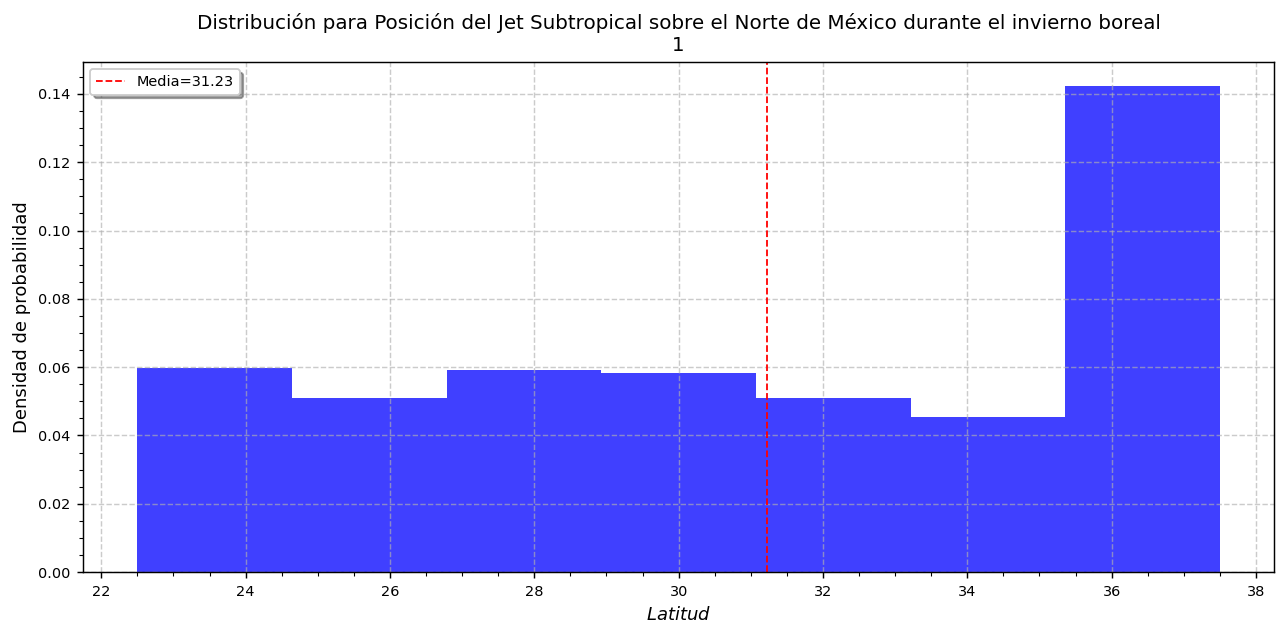

<Figure size 640x480 with 0 Axes>

In [39]:
PROB_POS = E5prob_posicion(mx_slicedE5,200)

In [ ]:
def E5prob_vel (ua1, nivel): #ua2,
    titulo_sim1 = input("Título simulación 1: ")
    nivel = float(nivel)
    
    sim1 = jsmetrics.jet_statistics.woollings_et_al_2010(ua1.sel(plev=nivel), filter_freq=4, window_size=20)
    
    d_vel = {
        f'velocidad del Jet Subtropical sobre el Norte de México durante el invierno boreal\n{titulo_sim1}': sim1['jet_speed'],
    }

    # Convertir calendario a gregoriano
    ua1 = ua1.convert_calendar(calendar='gregorian', align_on='year')
   
    plt.figure(figsize=(23, 10), dpi=130)
    for i, (k, v) in enumerate(d_vel.items(), start=1):
        plt.subplot(1, len(d_vel), i)
        valores_M = v.data.flatten()
        plt.hist(valores_M, bins=20, density=True, histtype='stepfilled', facecolor='pink', alpha=0.75)
        media = v.mean()
        plt.axvline(media, color="red", linewidth=1, linestyle="dashed", label=f'Media={media.values:.2f}')

        media=v.mean()
        lineplot_setup(None, None, '$Velocidad(m/s)$', 'Densidad de probabilidad', title=f'Distribución para {k}', legend=True)
    plt.tight_layout()
    plt.show()
    return plt.gcf

In [ ]:
PROB_VEL = E5prob_vel(mx_slicedE5,200) #nivel en hPa?

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Posición del STJ siguiendo metología de Liu et al (2021)</i> </h1>
#####   - `Anual` y `en una región ya elegida`

